This notebook will try to
1) approximately reproduce results of https://arxiv.org/pdf/hep-ph/0604193.pdf
2) introduce new constraints by contraction bounds

The story is as follows: $m_{\mathrm{diag}} = U^TM_{\nu} U$, so draw many hermitian (symmetric) mass matrices $M_{\nu}$, then solve eigenproblem and compare eigenvalues with $m_1, m_2, m_3$ (experiment) and eigenvectors $M_1, M_2, M_3$ with columns of mixing matrix $U$ (again experiment). First we stop at this point, hence we plot those that fit to experimental values. In the next step, we impose additionaly the contraction constraint on $U$, hoping that some new limits come into play.

We will compare results with experimental mixing matrix U given by

In [1]:
U_mix = [[[0.801,0.845],[0.513,0.579],[0.143,0.156]],[[0.233,0.507],[0.461,0.694],[0.631,0.778]],[[0.261,0.526],[0.471,0.701],[0.611,0.761]]]
# U_mix = [[[x[i][0]-0.5, x[i][1]+0.5] for i in range(0,3)] for x in U_mix]

and with neutrino masses bounded by $m_1<2.2$ and $|m_i-m_j|<0.05$, hence $m_2-m_1<0.05$, $m_3-m_1<0.05$ and $m_3-m_2<0.05$.

First we draw symmetric mass matrices $M_{\nu}$

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

100%|██████████| 99999/99999 [00:14<00:00, 6857.66it/s]


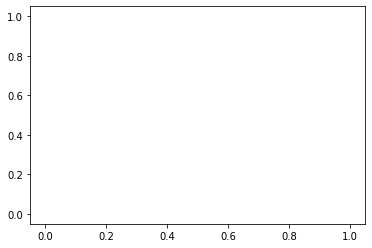

In [9]:
good_mat = [] # list to store good mass matrices

n=100000 # number of matrices drawn
bound = 0.25 # abs of lower and upper limits of elements of M_mass
for i in tqdm(range(1,n)):
    M_mass = (np.random.rand(3,3)-2*bound)/2
    M_mass = 1/2*(M_mass+np.transpose(M_mass))
    m_vals, m_vecs = np.linalg.eig(M_mass)
    
    # now there comes quite heavy preparation to order eigenfeatures
    eigs = [[m_vals[i],m_vecs[i]] for i in range(0,3)]
    eigs = sorted(eigs, key=lambda x: x[1][0], reverse=True)
    m_vals = [x[0] for x in eigs]
    m_vecs = [x[1] for x in eigs]
    
    if (0<m_vals[0]<2.2 and 0<m_vals[1]<2.2 and 0<m_vals[2]<2.2 and 
        (U_mix[0][0][0] < m_vecs[0][0] < U_mix[0][0][1] or  -U_mix[0][0][1]< m_vecs[0][0] < -U_mix[0][0][0]) and
        (U_mix[0][1][0] < m_vecs[0][1] < U_mix[0][1][1] or -U_mix[0][1][1] < m_vecs[0][1] < -U_mix[0][1][0]) and
        (U_mix[0][2][0] < m_vecs[0][2] < U_mix[0][2][1] or -U_mix[0][2][1] < m_vecs[0][2] < -U_mix[0][2][0]) and 
        (U_mix[1][0][0] < m_vecs[1][0] < U_mix[1][0][1] or -U_mix[1][0][1] < m_vecs[1][0] < -U_mix[1][0][0]) and
        (U_mix[1][1][0] < m_vecs[1][1] < U_mix[1][1][1] or -U_mix[1][1][1] < m_vecs[1][1] < -U_mix[1][1][0]) and 
        (U_mix[1][2][0] < m_vecs[1][2] < U_mix[1][2][1] or -U_mix[1][2][1] < m_vecs[1][2] < -U_mix[1][2][0]) and
        (U_mix[2][0][0] < m_vecs[2][0] < U_mix[2][0][1] or -U_mix[2][0][1] < m_vecs[2][0] < -U_mix[2][0][0]) and 
        (U_mix[2][1][0] < m_vecs[2][1] < U_mix[2][1][1] or -U_mix[2][1][1] < m_vecs[2][1] < -U_mix[2][1][0]) and
        (U_mix[2][2][0] < m_vecs[2][2] < U_mix[2][2][1] or -U_mix[2][2][1] < m_vecs[2][2] < -U_mix[2][2][0])): 
        
        good_mat.append(M_mass)
        
# good_mat
# fig = plt.figure()
# ax = Axes3D(fig)

# xs = [x[0][0] for x in good_mat]
# ys = [x[0][1] for x in good_mat]
# zs = [x[0][2] for x in good_mat]
# ax.scatter(xs, ys, zs)

# plt.show()

plt.plot([x[0][0] for x in good_mat], [x[0][1] for x in good_mat], '.')

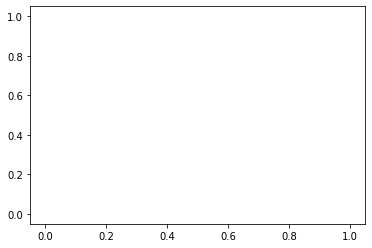

In [10]:
plt.plot([x[0][0] for x in good_mat], [x[0][2] for x in good_mat], 'o')

In [32]:
good_mat

[array([[ 0.09186268,  0.07605638, -0.03945783],
        [ 0.07605638,  0.09444363, -0.07922971],
        [-0.03945783, -0.07922971,  0.23996788]]),
 array([[ 0.20374471, -0.0638441 ,  0.00032986],
        [-0.0638441 ,  0.1242316 , -0.06891308],
        [ 0.00032986, -0.06891308,  0.17535826]]),
 array([[ 0.2460505 , -0.04209549, -0.09398264],
        [-0.04209549,  0.07197678,  0.05909553],
        [-0.09398264,  0.05909553,  0.11104045]]),
 array([[ 0.12092224, -0.11118424,  0.00961354],
        [-0.11118424,  0.2445155 ,  0.11461975],
        [ 0.00961354,  0.11461975,  0.17261148]])]